# Nama : Rachmat
# Kelas : Muzero

# Decision Tree Classifier

#1. Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#2. Download dan Memuat Dataset



In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Wayan123/dataset-ml/main/car_evaluation.csv', header = None)
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


#3. Exploratory Data Analysis

In [ ]:
df.shape

(1728, 7)

In [ ]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
df.tail()

,0,1,2,3,4,5,6
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [ ]:
kolom = ['hrg_beli', 'hrg_maint', 'byk_pintu', 'penumpang', 'bagasi', 'keamanan', 'class']
df.columns = kolom
df

,hrg_beli,hrg_maint,byk_pintu,penumpang,bagasi,keamanan,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [ ]:
df.info

<bound method DataFrame.info of      hrg_beli hrg_maint byk_pintu penumpang bagasi keamanan  class
0       vhigh     vhigh         2         2  small      low  unacc
1       vhigh     vhigh         2         2  small      med  unacc
2       vhigh     vhigh         2         2  small     high  unacc
3       vhigh     vhigh         2         2    med      low  unacc
4       vhigh     vhigh         2         2    med      med  unacc
...       ...       ...       ...       ...    ...      ...    ...
1723      low       low     5more      more    med      med   good
1724      low       low     5more      more    med     high  vgood
1725      low       low     5more      more    big      low  unacc
1726      low       low     5more      more    big      med   good
1727      low       low     5more      more    big     high  vgood

[1728 rows x 7 columns]>

In [ ]:
#Jumlah data yang memiliki nilai null / NaN
df.isnull().sum()

hrg_beli     0
hrg_maint    0
byk_pintu    0
penumpang    0
bagasi       0
keamanan     0
class        0
dtype: int64

In [ ]:
# Mengecek data yang sama
df.duplicated().sum()

0

In [ ]:
#Mengecek nilai-nilai yang ada pada kolom Class
df.iloc[:,6].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

### Univariate Analysis dari semua kolom

<AxesSubplot:xlabel='class', ylabel='count'>

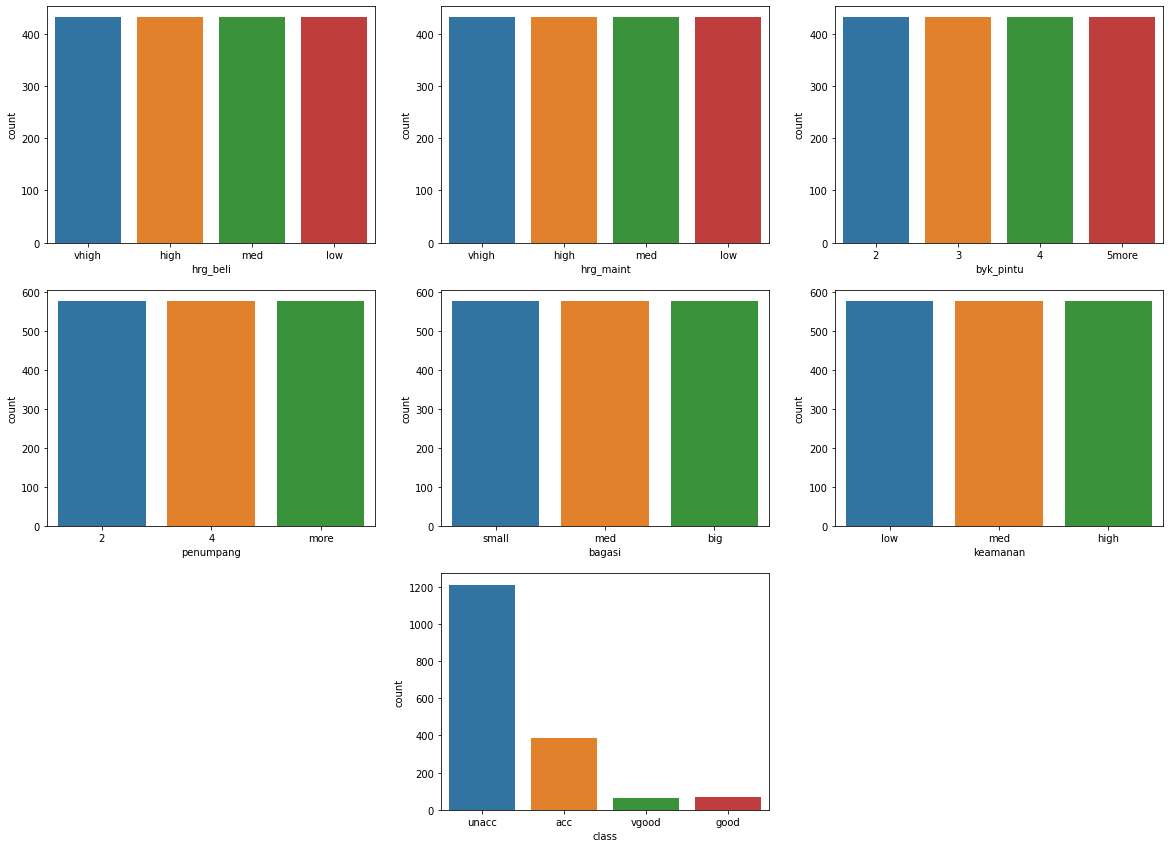

In [ ]:
f = plt.figure(figsize=(20,20))

f.add_subplot(4,3,1)
sns.countplot(x='hrg_beli', data = df)

f.add_subplot(4,3,2)
sns.countplot(x='hrg_maint', data = df)

f.add_subplot(4,3,3)
sns.countplot(x='byk_pintu', data = df)

f.add_subplot(4,3,4)
sns.countplot(x='penumpang', data = df)

f.add_subplot(4,3,5)
sns.countplot(x='bagasi', data = df)

f.add_subplot(4,3,6)
sns.countplot(x='keamanan', data = df)

f.add_subplot(4,3,8)
sns.countplot(x='class', data = df)

#4. Menginisialisasi variabel dependen dan variabel independen

In [ ]:
X = df.drop(['class'], axis=1)

y = df['class']

#5. Membagi data menjadi test dan train

In [ ]:
from sklearn.model_selection import train_test_split
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
X_train, X_cv, y_train, y_cv = train_test_split(X_1, y_1, test_size = 0.25, random_state = 42)

X_train.shape, X_test.shape

((972, 6), (432, 6))

In [ ]:
print('Training Dataset',X_train.shape,y_train.shape)
print('\nDistribusi label class di Training Set\n',y_train.value_counts())
print('\n***********')

print("\n CrossValidation Dataset",X_cv.shape,y_cv.shape)
print('\nClass label distribution in Cross Validation Set\n',y_cv.value_counts())

print('\n***********')
print("\n Test Dataset",X_test.shape,y_test.shape)
print('\nDistribusi label class di Test Set\n',y_test.value_counts())

Training Dataset (972, 6) (972,)

Distribusi label class di Training Set
 unacc    690
acc      204
good      43
vgood     35
Name: class, dtype: int64

***********

 CrossValidation Dataset (324, 6) (324,)

Class label distribution in Cross Validation Set
 unacc    226
acc       77
good      11
vgood     10
Name: class, dtype: int64

***********

 Test Dataset (432, 6) (432,)

Distribusi label class di Test Set
 unacc    294
acc      103
vgood     20
good      15
Name: class, dtype: int64


#6. Feature Engineering

In [ ]:
X_train.dtypes

hrg_beli     object
hrg_maint    object
byk_pintu    object
penumpang    object
bagasi       object
keamanan     object
dtype: object

In [ ]:
X_train.head()

,hrg_beli,hrg_maint,byk_pintu,penumpang,bagasi,keamanan
564,high,high,2,more,big,low
1702,low,low,5more,2,small,med
1666,low,low,3,more,small,med
299,vhigh,med,5more,2,small,high
1712,low,low,5more,4,small,high


In [ ]:
list(X_train.columns)

['hrg_beli', 'hrg_maint', 'byk_pintu', 'penumpang', 'bagasi', 'keamanan']

In [ ]:
!pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 10.6 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=list(X_train.columns))

#Melakukan encoding pada data train dan test
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
print(X.head() , '\n')
print(X.shape)

  hrg_beli hrg_maint byk_pintu penumpang bagasi keamanan
0    vhigh     vhigh         2         2  small      low
1    vhigh     vhigh         2         2  small      med
2    vhigh     vhigh         2         2  small     high
3    vhigh     vhigh         2         2    med      low
4    vhigh     vhigh         2         2    med      med 

(1728, 6)


In [ ]:
print('Dataset Original')
print('\n\n',X.head())
print('\n Dataset train yang sudah di-encode')
print('\n',X_train.head())
print('\n Dataset test yang sudah di-encode')
print('\n',X_test.head())

Dataset Original


   hrg_beli hrg_maint byk_pintu penumpang bagasi keamanan
0    vhigh     vhigh         2         2  small      low
1    vhigh     vhigh         2         2  small      med
2    vhigh     vhigh         2         2  small     high
3    vhigh     vhigh         2         2    med      low
4    vhigh     vhigh         2         2    med      med

 Dataset train yang sudah di-encode

       hrg_beli  hrg_maint  byk_pintu  penumpang  bagasi  keamanan
564          1          1          1          1       1         1
1702         2          2          2          2       2         2
1666         2          2          3          1       2         2
299          3          3          2          2       2         3
1712         2          2          2          3       2         3

 Dataset test yang sudah di-encode

       hrg_beli  hrg_maint  byk_pintu  penumpang  bagasi  keamanan
599          1          1          4          2       3         3
1201         4          2        

<AxesSubplot:xlabel='hrg_beli', ylabel='count'>

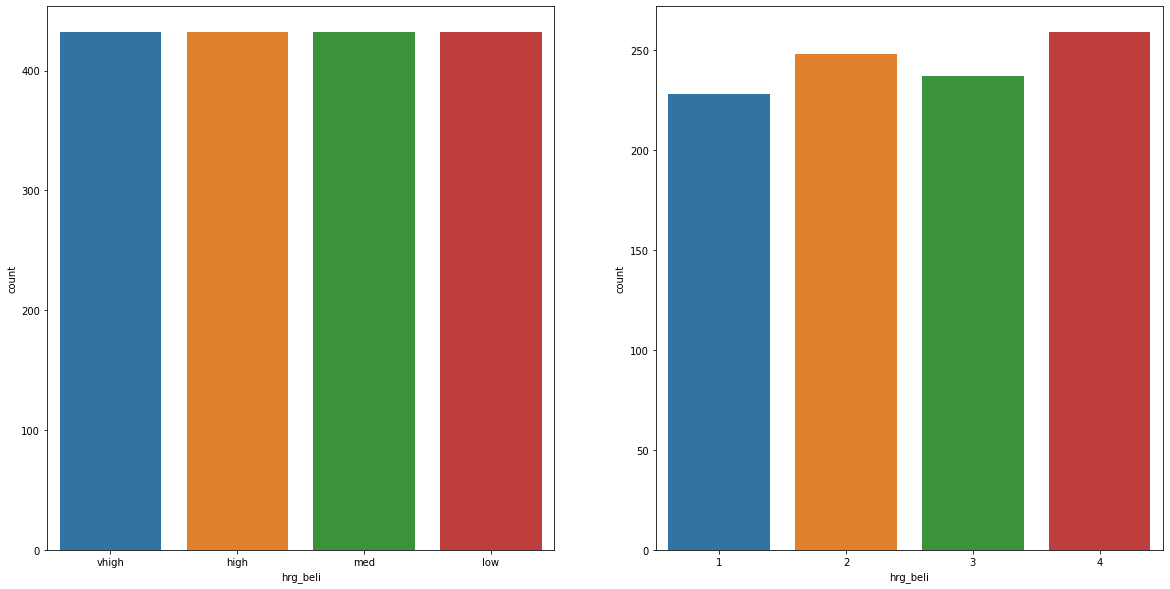

In [ ]:
f = plt.figure(figsize=(20,10))

f.add_subplot(1,2,1)
sns.countplot(x='hrg_beli', data = X)

f.add_subplot(1,2,2)
sns.countplot(x='hrg_beli', data = X_train)

#7. Decision Tree Classifier Menggunakan Gini Index

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
# Predict test set
y_pred_gini = clf_gini.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

# Cek akurasi model yang menggunakan gini index
print('Skor akurasi model menggunakan criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Skor akurasi model menggunakan criterion gini index: 0.8032


## Cek Overfitting / Underfitting

In [ ]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc', 'unacc',
       'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'acc', 'unacc',
       'acc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'acc', 'unacc',
       'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'acc',
       'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc',
       'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'acc',
       'unacc', 'acc', 'unacc', 'unacc', 'una

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7809


In [ ]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7809
Test set score: 0.8032


## Visualissai Decision Treenya

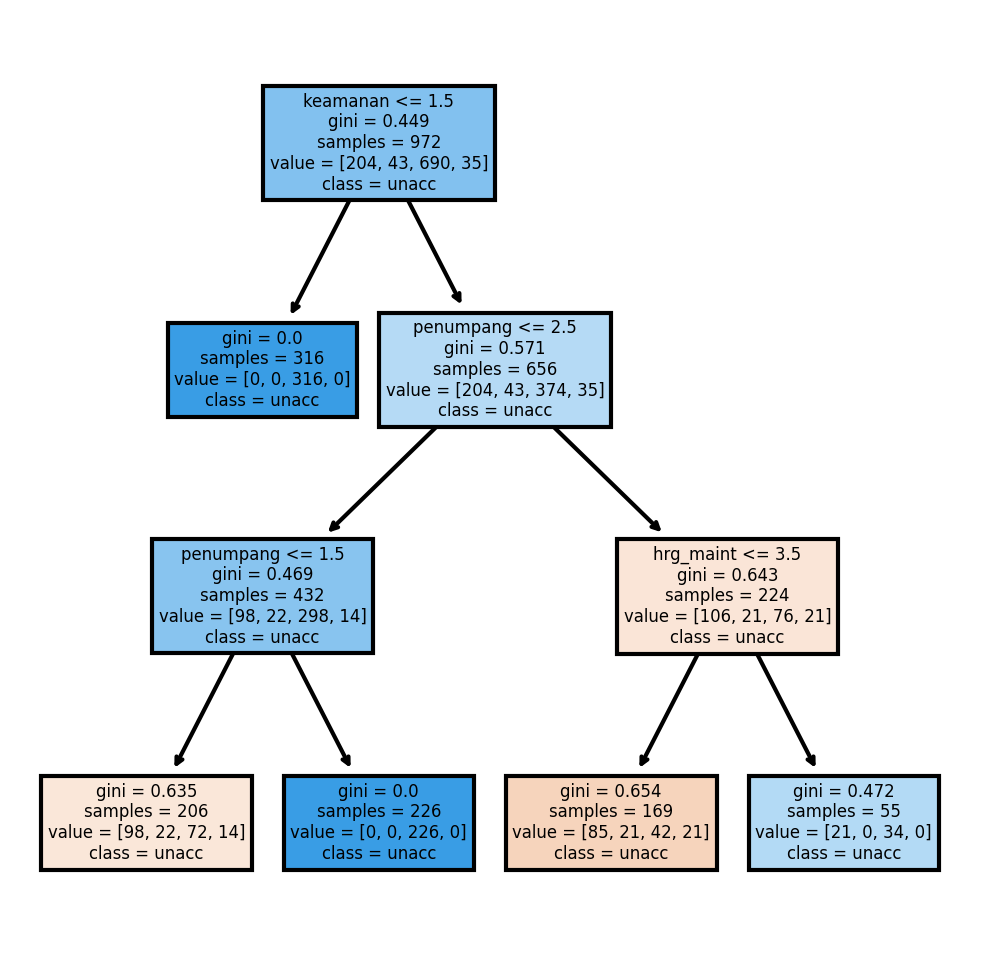

In [ ]:
from sklearn import tree
# Visualisasi Decision Tree
cols=list(X_train.columns)
trgt=df['class']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf_gini,feature_names = cols, class_names=trgt,filled = True);

#7. Decision Tree Classifier Menggunakan Entropy

In [ ]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
y_pred_en = clf_en.predict(X_test)

## Cek Overfitting / Underfitting

In [ ]:
from sklearn.metrics import accuracy_score

# Cek akurasi
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7708


In [ ]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc',
       'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'acc',
       'unacc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7747


In [ ]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7747
Test set score: 0.7708


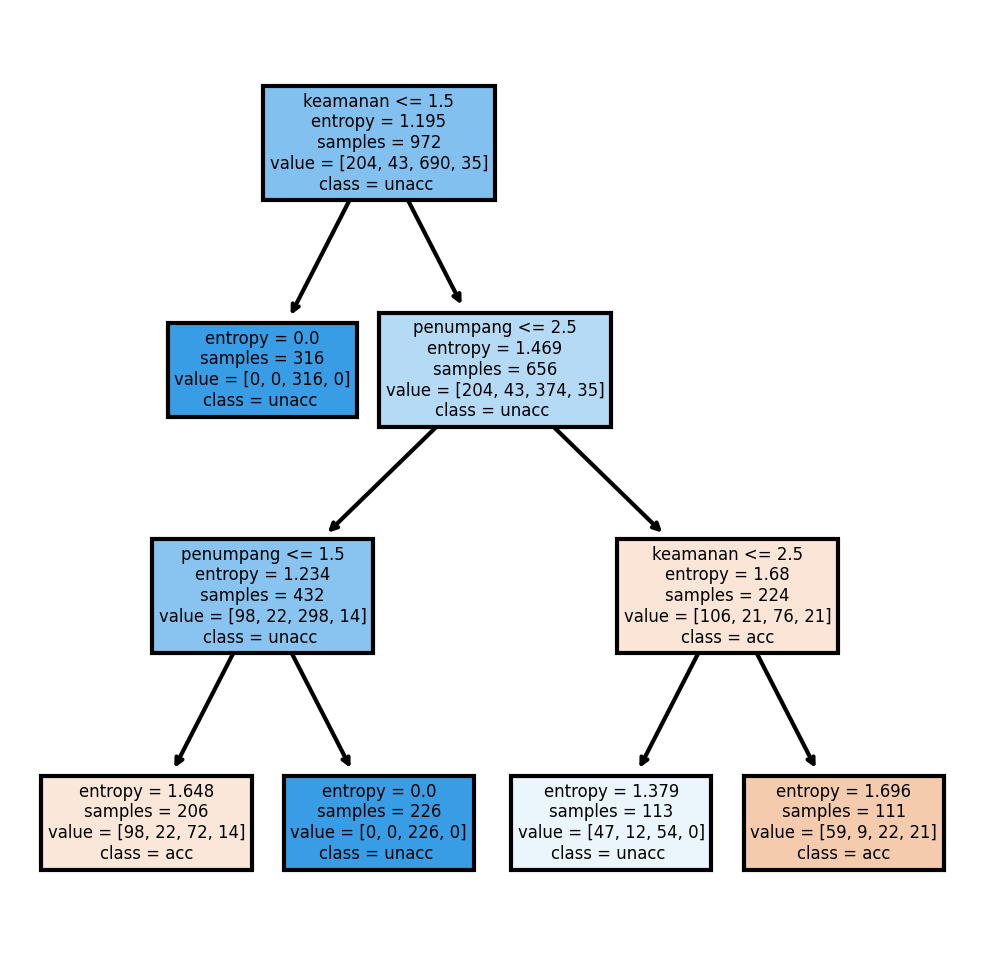

In [ ]:
from sklearn import tree
# Visualisasi Decision Tree
cols=list(X_train.columns)
trgt=['acc','good','unacc ',' vgood']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf_en,feature_names = cols, class_names=trgt,filled = True);

#8. Confusion Matrix

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

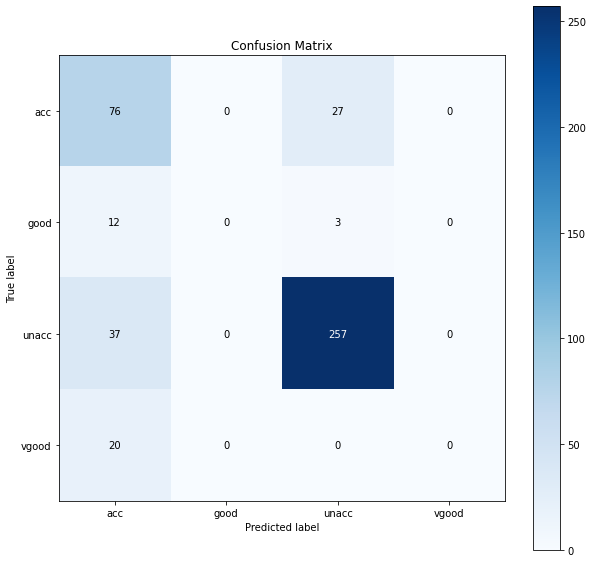

In [ ]:
from sklearn.metrics import confusion_matrix
import scikitplot.metrics as skplt

skplt.plot_confusion_matrix(y_test,y_pred_en, figsize=(10,10))

In [ ]:
print(confusion_matrix(y_test, y_pred_en))

[[ 76   0  27   0]
 [ 12   0   3   0]
 [ 37   0 257   0]
 [ 20   0   0   0]]


#9. Classification Report

In [ ]:
from sklearn.metrics import classification_report

print('\n\n Classification Report')
print(classification_report(y_test,y_pred_en))



 Classification Report
              precision    recall  f1-score   support

         acc       0.52      0.74      0.61       103
        good       0.00      0.00      0.00        15
       unacc       0.90      0.87      0.88       294
       vgood       0.00      0.00      0.00        20

    accuracy                           0.77       432
   macro avg       0.35      0.40      0.37       432
weighted avg       0.73      0.77      0.75       432



<AxesSubplot:xlabel='class', ylabel='count'>

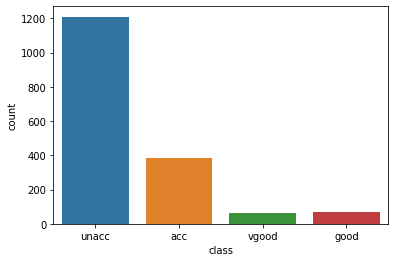

In [ ]:
f.add_subplot(1,1,1)
sns.countplot(x='class', data = df)

# Hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters={'criterion' : ['entropy', 'gini'],
            'max_depth': list(range(1,30)),
            'min_samples_leaf' : list(range(5,200,20)),
            'min_samples_split': list(range(5,200,20))
            }
model=GridSearchCV(DecisionTreeClassifier(class_weight='balanced'),parameters,n_jobs=-1,cv=10,scoring='accuracy')
model.fit(X_train,y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29],
                         'min_samples_leaf': [5, 25, 45, 65, 85, 105, 125, 145,
                                              165, 185],
                         'min_samples_split': [5, 25, 45, 65, 85, 105, 125, 145,
                                               165, 185]},
             scoring='accuracy')

In [ ]:
print(f'Akurasi : {model.best_score_} | Best criterion : {model.best_params_["criterion"]}')

Akurasi : 0.7591521144540291 | Best criterion : entropy


In [ ]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7708


In [ ]:
test = model.best_estimator_
test

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=19, min_samples_leaf=5, min_samples_split=5)

In [ ]:
p = test.predict(X_test)

In [ ]:
print('Training set score: {:.4f}'.format(test.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(test.score(X_test, y_test)))

Training set score: 0.8169
Test set score: 0.7569


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

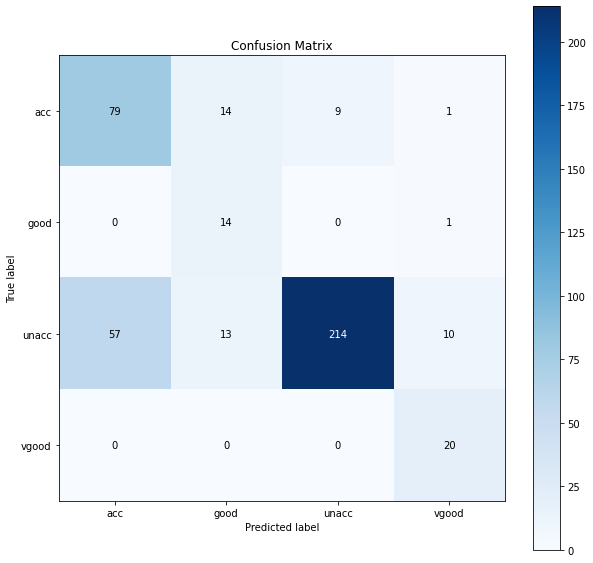

In [ ]:
skplt.plot_confusion_matrix(y_test,p, figsize=(10,10))

In [ ]:
print('Confusion Matrix\n', confusion_matrix(y_test, p),'\n\nClassification Report \n',classification_report(y_test,p))

Confusion Matrix
 [[ 79  14   9   1]
 [  0  14   0   1]
 [ 57  13 214  10]
 [  0   0   0  20]] 

Classification Report 
               precision    recall  f1-score   support

         acc       0.58      0.77      0.66       103
        good       0.34      0.93      0.50        15
       unacc       0.96      0.73      0.83       294
       vgood       0.62      1.00      0.77        20

    accuracy                           0.76       432
   macro avg       0.63      0.86      0.69       432
weighted avg       0.83      0.76      0.77       432



[Text(0.43487639925373134, 0.9545454545454546, 'keamanan <= 2.5\nentropy = 2.0\nsamples = 972\nvalue = [243.0, 243.0, 243.0, 243.0]\nclass = unacc '),
 Text(0.19309701492537312, 0.8636363636363636, 'keamanan <= 1.5\nentropy = 1.557\nsamples = 647\nvalue = [113.162, 158.233, 184.539, 0.0]\nclass = unacc '),
 Text(0.18563432835820895, 0.7727272727272727, 'entropy = 0.0\nsamples = 316\nvalue = [0.0, 0.0, 111.287, 0.0]\nclass = unacc '),
 Text(0.20055970149253732, 0.7727272727272727, 'hrg_maint <= 1.5\nentropy = 1.518\nsamples = 331\nvalue = [113.162, 158.233, 73.252, 0.0]\nclass = good'),
 Text(0.05970149253731343, 0.6818181818181818, 'penumpang <= 1.5\nentropy = 0.985\nsamples = 85\nvalue = [28.588, 0.0, 21.483, 0.0]\nclass = acc'),
 Text(0.029850746268656716, 0.5909090909090909, 'hrg_beli <= 2.5\nentropy = 0.775\nsamples = 28\nvalue = [16.676, 0.0, 4.93, 0.0]\nclass = acc'),
 Text(0.014925373134328358, 0.5, 'hrg_beli <= 1.5\nentropy = 0.487\nsamples = 14\nvalue = [11.912, 0.0, 1.409, 0.

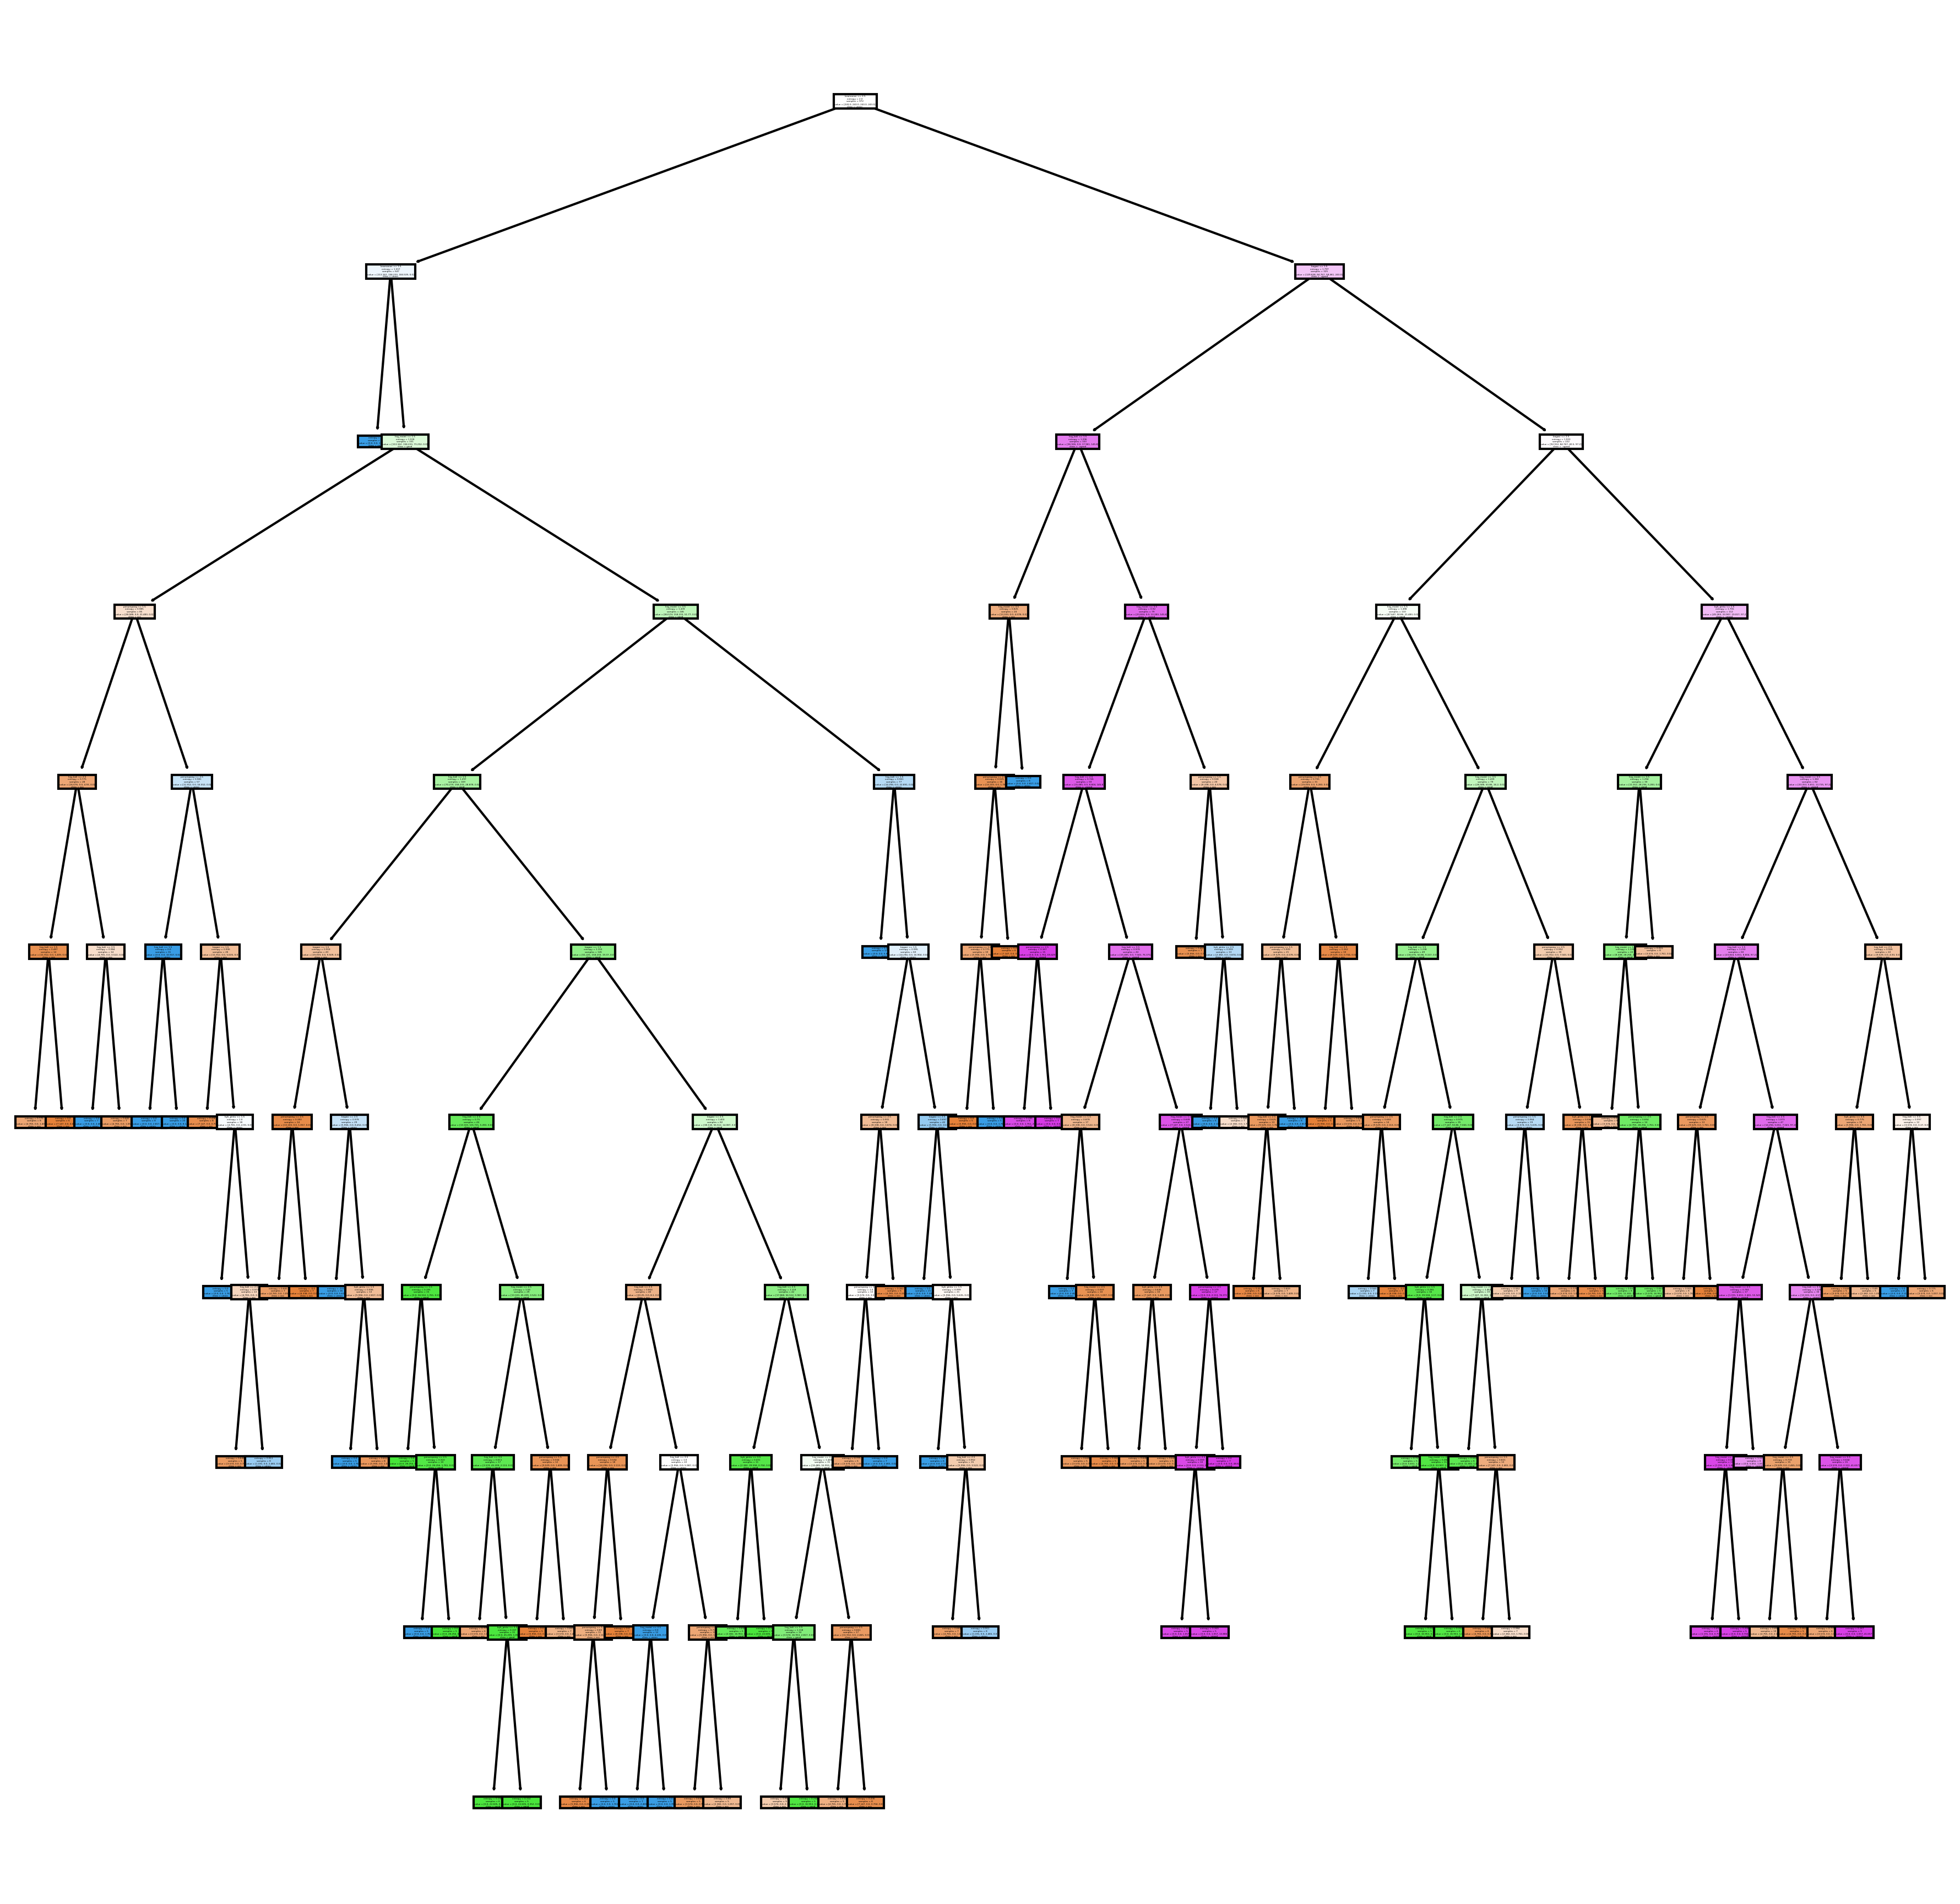

In [ ]:
from sklearn import tree
# Visualising Decision Tree
cols=list(X_train.columns)
trgt=['acc','good','unacc ',' vgood']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=300)
tree.plot_tree(test,feature_names = cols, class_names=trgt,filled = True)